In [1]:
#Python 3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
data=pd.read_csv("flights.csv")

In [2]:
#chequear valores Nan
data.isnull().any()

MONTH        False
DAY          False
WEEKDAY      False
AIRLINE      False
ORG_AIR      False
DEST_AIR     False
SCHED_DEP    False
DEP_DELAY     True
AIR_TIME      True
DIST         False
SCHED_ARR    False
ARR_DELAY     True
DIVERTED     False
CANCELLED    False
dtype: bool

# Mostrar el número de vuelos cancelados por aerolínea por día

In [3]:
cancel_by_day_and_al = data.groupby(['DAY', 'MONTH','AIRLINE']).agg({'CANCELLED': ['sum']})


In [4]:
cancel_by_day_and_al

CANCELLED
                        sum
DAY MONTH AIRLINE          
1   1     AA              1
          AS              0
          B6              0
          DL              0
          EV              1
...                     ...
31  12    NK              0
          OO              0
          UA              0
          VX              0
          WN              0

[4171 rows x 1 columns]

# Mostrar el número y porcentaje de vuelos cancelados y desviados por día

In [5]:
cancel_by_day = data.groupby(['MONTH','DAY']).agg({'CANCELLED': ['sum','count']})
cancel_by_day.columns=['total_cancelled','total_fli']

In [6]:
cancel_by_day['%'] = cancel_by_day['total_cancelled']*100/cancel_by_day['total_fli']

In [7]:
cancel_by_day=cancel_by_day.reset_index()

In [8]:
cancel_by_day

,MONTH,DAY,total_cancelled,total_fli,%
0,1,1,7,136,5.147059
1,1,2,2,171,1.169591
2,1,3,7,182,3.846154
3,1,4,9,177,5.084746
4,1,5,9,180,5.000000
5,1,6,2,170,1.176471
6,1,7,0,144,0.000000
7,1,8,9,152,5.921053
8,1,9,4,159,2.515723
9,1,10,1,121,0.826446


In [9]:
divert_by_day = data.groupby(['MONTH','DAY']).agg({'DIVERTED': ['sum','count']})
divert_by_day.columns=['total_divert','total_fli']
divert_by_day['%'] = divert_by_day['total_divert']*100/divert_by_day['total_fli']

In [10]:
divert_by_day=divert_by_day.reset_index()

In [11]:
divert_by_day

,MONTH,DAY,total_divert,total_fli,%
0,1,1,0,136,0.000000
1,1,2,0,171,0.000000
2,1,3,0,182,0.000000
3,1,4,1,177,0.564972
4,1,5,0,180,0.000000
5,1,6,1,170,0.588235
6,1,7,0,144,0.000000
7,1,8,2,152,1.315789
8,1,9,0,159,0.000000
9,1,10,0,121,0.000000


In [12]:
result = pd.concat([cancel_by_day, divert_by_day], axis=1, sort=False)

In [13]:
result

,MONTH,DAY,total_cancelled,total_fli,%,MONTH,DAY,total_divert,total_fli,%
0,1,1,7,136,5.147059,1,1,0,136,0.000000
1,1,2,2,171,1.169591,1,2,0,171,0.000000
2,1,3,7,182,3.846154,1,3,0,182,0.000000
3,1,4,9,177,5.084746,1,4,1,177,0.564972
4,1,5,9,180,5.000000,1,5,0,180,0.000000
5,1,6,2,170,1.176471,1,6,1,170,0.588235
6,1,7,0,144,0.000000,1,7,0,144,0.000000
7,1,8,9,152,5.921053,1,8,2,152,1.315789
8,1,9,4,159,2.515723,1,9,0,159,0.000000
9,1,10,1,121,0.826446,1,10,0,121,0.000000


In [14]:
result.columns=['MONTH', 'DAY', 'total_cancelled', 'total_fli', '% cancelled', 'MONTH_y', 'DAY_y',
       'total_divert', 'total_fli_y', '% diverted']

In [15]:
result=result.drop(['total_fli_y','MONTH_y', 'DAY_y'], axis=1).reset_index()
result

,index,MONTH,DAY,total_cancelled,total_fli,% cancelled,total_divert,% diverted
0,0,1,1,7,136,5.147059,0,0.000000
1,1,1,2,2,171,1.169591,0,0.000000
2,2,1,3,7,182,3.846154,0,0.000000
3,3,1,4,9,177,5.084746,1,0.564972
4,4,1,5,9,180,5.000000,0,0.000000
5,5,1,6,2,170,1.176471,1,0.588235
6,6,1,7,0,144,0.000000,0,0.000000
7,7,1,8,9,152,5.921053,2,1.315789
8,8,1,9,4,159,2.515723,0,0.000000
9,9,1,10,1,121,0.826446,0,0.000000


#  Para cada origen y destino, mostrar el total de vuelos, el número y porcentaje de vuelos cancelados y generar estadísticas para el tiempo de vuelo

In [16]:
origen_dest=data.groupby(['ORG_AIR','DEST_AIR']).agg({'CANCELLED': ['sum','count']})
origen_dest.columns=['total_cancelled','total_fli']
origen_dest['%'] = origen_dest['total_cancelled']*100/origen_dest['total_fli']

In [17]:
origen_dest.reset_index()

,ORG_AIR,DEST_AIR,total_cancelled,total_fli,%
0,ATL,ABE,0,31,0.000000
1,ATL,ABQ,0,16,0.000000
2,ATL,ABY,0,19,0.000000
3,ATL,ACY,0,6,0.000000
4,ATL,AEX,0,40,0.000000
5,ATL,AGS,0,83,0.000000
6,ATL,ALB,0,33,0.000000
7,ATL,ANC,0,2,0.000000
8,ATL,ASE,0,1,0.000000
9,ATL,ATW,0,10,0.000000


# Estadísticas para el tiempo de vuelo

In [18]:
estad=data[['ORG_AIR','DEST_AIR','AIR_TIME']]

In [19]:
#eliminar tiempos Nan
estad=estad.dropna().reset_index()

In [20]:
estad=estad.groupby(['ORG_AIR','DEST_AIR']).agg({'AIR_TIME': ['min','max','mean','sum','count']})
estad.columns=['min','max','mean','sum','count']

estad.reset_index()

,ORG_AIR,DEST_AIR,min,max,mean,sum,count
0,ATL,ABE,81.0,112.0,96.387097,2988.0,31
1,ATL,ABQ,156.0,189.0,170.500000,2728.0,16
2,ATL,ABY,25.0,34.0,28.578947,543.0,19
3,ATL,ACY,85.0,94.0,91.333333,548.0,6
4,ATL,AEX,69.0,100.0,78.725000,3149.0,40
5,ATL,AGS,23.0,37.0,28.819277,2392.0,83
6,ATL,ALB,96.0,121.0,108.181818,3570.0,33
7,ATL,ANC,434.0,443.0,438.500000,877.0,2
8,ATL,ASE,192.0,192.0,192.000000,192.0,1
9,ATL,ATW,94.0,118.0,106.400000,1064.0,10


# Mostrar la distribución de aerolíneas que vuelan en los siguientes rangos de distancias:  [0, 200, 500, 1000, 2000, 2001+]

In [21]:
dist=data[['AIRLINE','DIST']].sort_values(by=["AIRLINE","DIST"]).drop_duplicates()

In [22]:
#dist

In [23]:
dist['range']=np.where((dist['DIST']>=0) & (dist['DIST']<200), 'r1_0_200',
             np.where((dist['DIST']>=200) & (dist['DIST']<500), 'r2_200_500',
             np.where((dist['DIST']>=500) & (dist['DIST']<1000), 'r3_500_1000', 
             np.where((dist['DIST']>=1000) & (dist['DIST']<2000), 'r4_1000_2000', 
             np.where((dist['DIST']>=2000), 'r5_2000+', 'nan')))))

In [24]:
dist=dist[['AIRLINE','range']].drop_duplicates().sort_values(by="range").groupby("range").agg({'range': ['count']})

In [25]:
dist.columns=['count']
dist.reset_index(inplace=True)

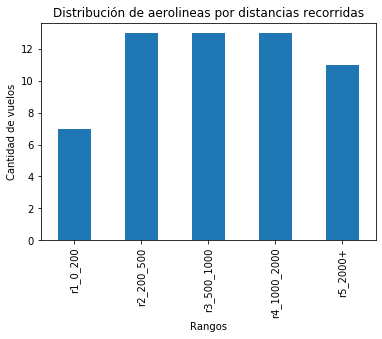

In [26]:
dist.plot(x='range', y='count', kind='bar',legend=False,title="Distribución de aerolineas por distancias recorridas") 
plt.xlabel('Rangos')
plt.ylabel('Cantidad de vuelos')
plt.show()

# Visualizacion de los datos

In [27]:
vuelos_cancelados= data.groupby(['AIRLINE']).agg({'CANCELLED': ['sum','count']})
vuelos_cancelados.columns=['Vuelos_cancelados','Vuelos_Totales']
vuelos_cancelados.reset_index(inplace=True)

In [28]:
vuelos_cancelados

,AIRLINE,Vuelos_cancelados,Vuelos_Totales
0,AA,154,8900
1,AS,0,768
2,B6,1,543
3,DL,38,10601
4,EV,146,5858
5,F9,10,1317
6,HA,0,112
7,MQ,152,3471
8,NK,25,1516
9,OO,142,6588


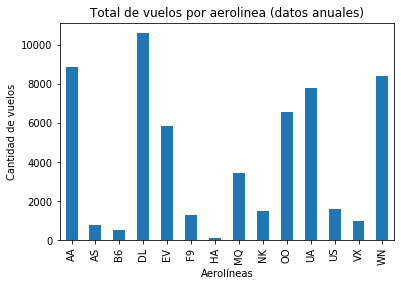

In [29]:
#Datos anuales, se excluye octubre porque los datos no están incluidos en dataset original
vuelos_cancelados.plot(x='AIRLINE', y='Vuelos_Totales', kind='bar',legend=False,title="Total de vuelos por aerolinea (datos anuales)") 
plt.xlabel('Aerolíneas')
plt.ylabel('Cantidad de vuelos')
plt.show()

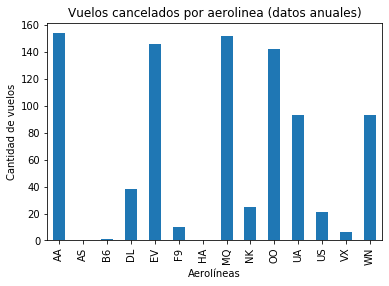

In [30]:
vuelos_cancelados.plot(x='AIRLINE', y='Vuelos_cancelados', kind='bar',legend=False,title="Vuelos cancelados por aerolinea (datos anuales)") 
plt.xlabel('Aerolíneas')
plt.ylabel('Cantidad de vuelos')
plt.show()

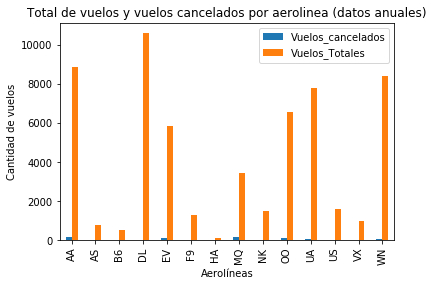

In [31]:
vuelos_cancelados.plot(x='AIRLINE', y=['Vuelos_cancelados','Vuelos_Totales'], kind='bar',legend=True,title="Total de vuelos y vuelos cancelados por aerolinea (datos anuales)") 
plt.xlabel('Aerolíneas')
plt.ylabel('Cantidad de vuelos')


plt.show()

In [32]:
data_por_tramo=data[['ORG_AIR','DEST_AIR','AIRLINE','AIR_TIME']]
data_por_tramo=data_por_tramo.dropna().reset_index() #elimina los vuelos cancelados ("AIR_TIME=Nan")

In [33]:
data_por_tramo['tramo']=data_por_tramo['ORG_AIR']+ "_"+data_por_tramo['DEST_AIR']

In [34]:
data_por_tramo=data_por_tramo.groupby(['tramo']).agg({'tramo': ['count']})
data_por_tramo.columns=['Total_de_vuelos']
data_por_tramo.reset_index(inplace=True)

In [35]:
tramos_poco_cob=data_por_tramo.loc[(data_por_tramo['Total_de_vuelos'] < 10)]

In [36]:
tramos_poco_cob.shape

(164, 2)

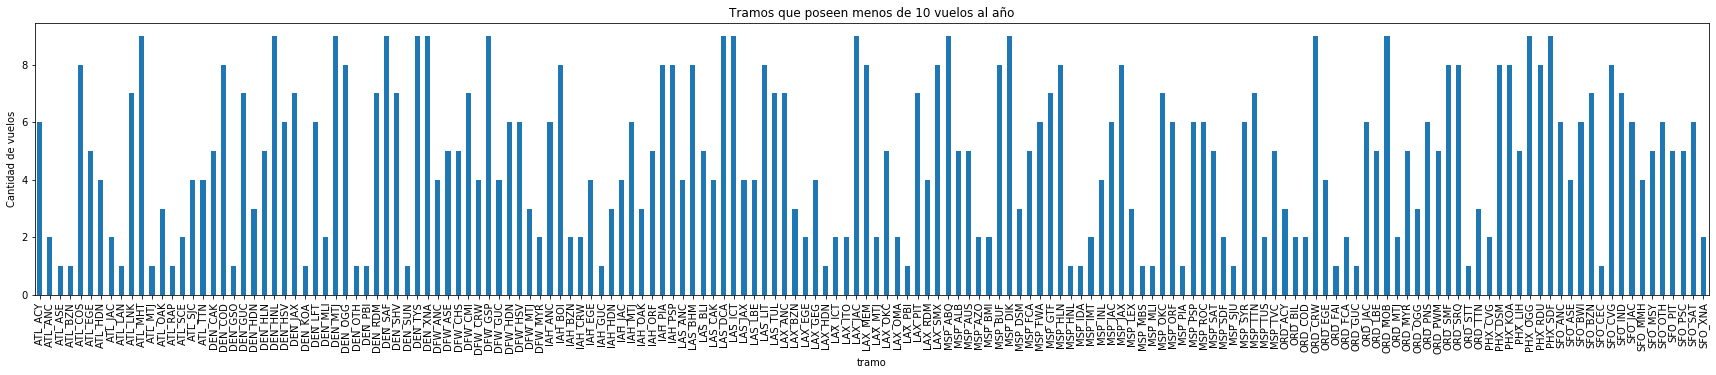

In [37]:
matplotlib.rc('figure', figsize=[30,5])

tramos_poco_cob.plot(x='tramo', y='Total_de_vuelos', kind='bar',legend=False,title="Tramos que poseen menos de 10 vuelos al año")
plt.ylabel('Cantidad de vuelos')


plt.show()